In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(SummarizedExperiment))

ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=8, repr.plot.height=5)

In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 6)
addArchRGenome("hg38")

Setting default number of Parallel threads to 6.

Setting default genome to Hg38.



In [6]:
PROJDIR='../../../data/raw_data/hg38/Corces_2020'
ARCHDIR=file.path(PROJDIR,'ArchR_Corces2020_caudate_labeled')
proj = loadArchRProject(ARCHDIR)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [8]:
proj = addUMAP(proj, name = "UMAP", force = TRUE,
               reducedDims = "Harmony")

12:55:20 UMAP embedding parameters a = 0.7669 b = 1.223

12:55:20 Read 26314 rows and found 30 numeric columns

12:55:20 Using Annoy for neighbor search, n_neighbors = 40

12:55:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

12:55:32 Writing NN index file to temp file /tmp/RtmpwTecBR/file792f2ade8e04

12:55:32 Searching Annoy index using 4 threads, search_k = 4000

12:55:51 Annoy recall = 100%

12:55:52 Commencing smooth kNN distance calibration using 4 threads

12:55:55 Initializing from normalized Laplacian + noise

12:56:03 Commencing optimization for 200 epochs, with 1593064 positive edges

12:57:04 Optimization finished



Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-792f2480b1f1-Date-2020-10-23_Time-13-08-34.log
If there is an issue, please report to github with logFile!

2020-10-23 13:08:35 : Computing Total Across All Features, 0.008 mins elapsed.

2020-10-23 13:08:39 : Computing Top Features, 0.066 mins elapsed.

###########
2020-10-23 13:08:40 : Running LSI (1 of 2) on Top Features, 0.083 mins elapsed.
###########

2020-10-23 13:08:40 : Sampling Cells (N = 10001) for Estimated LSI, 0.085 mins elapsed.

2020-10-23 13:08:40 : Creating Sampled Partial Matrix, 0.086 mins elapsed.

2020-10-23 13:09:10 : Computing Estimated LSI (projectAll = FALSE), 0.589 mins elapsed.

2020-10-23 13:14:34 : Identifying Clusters, 5.984 mins elapsed.

2020-10-23 13:15:28 : Identified 8 Clusters, 6.883 mins elapsed.

2020-10-23 13:15:28 : Saving LSI Iteration, 6.883 mins elapsed.

2020-10-23 13:16:19 : Creating Cluster Matrix on the total Group Features, 7.748 mins elapsed.

2020-10-23 13:17:31 : C

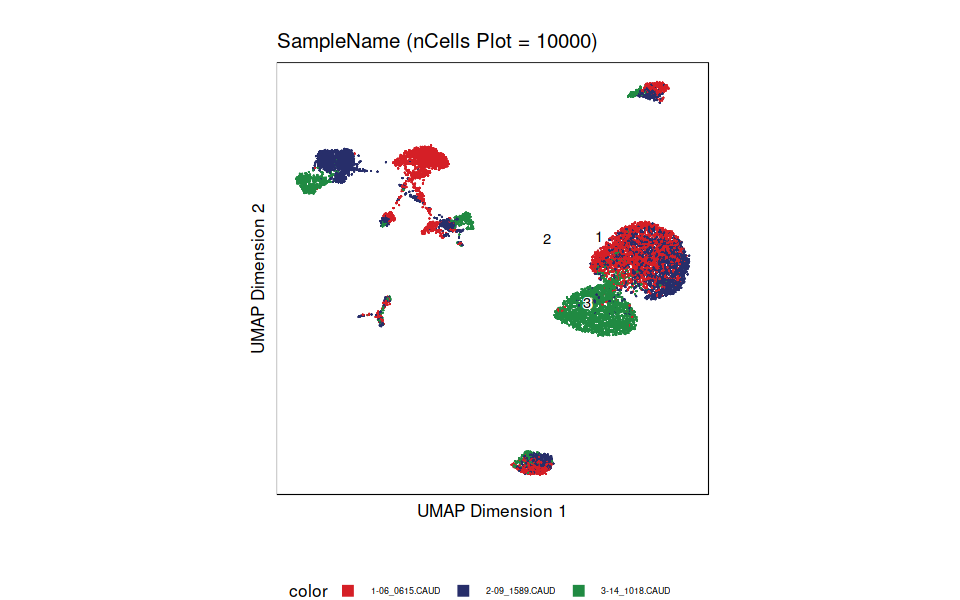

In [22]:
# add iterative LSI
proj <- addIterativeLSI(
  ArchRProj = proj, useMatrix = "OrthologPeakMatrix", 
  name = "OrthologIterativeLSI",
  LSIMethod = 2, #"tf-logidf", "log(tf-idf)", "logtf-logidf"
  iterations = 2, # increase this if noticing subtle batch effects
  scaleTo = 3000,
  selectionMethod = 'var',
  clusterParams = list( # See Seurat::FindClusters
    resolution = c(.1, .2), # lower this if noticing subtle batch effects
    sampleCells = 10000,  n.start = 10), 
  varFeatures = 150000, # also can reduce this if noticing subtle batch effects
  dimsToUse = 1:40, force = TRUE)

In [23]:
proj <- addHarmony( ArchRProj = proj, reducedDims = "OrthologIterativeLSI",
                    name = "OrthologHarmony", groupBy = "Sample",force = TRUE)

proj = addUMAP(proj, name = "OrthologUMAP", force = TRUE,
               reducedDims = "OrthologHarmony")

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations

13:30:00 UMAP embedding parameters a = 0.7669 b = 1.223

13:30:00 Read 26314 rows and found 40 numeric columns

13:30:00 Using Annoy for neighbor search, n_neighbors = 40

13:30:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

13:30:10 Writing NN index file to temp file /tmp/RtmpwTecBR/file792f4a9429a8

13:30:11 Searching Annoy index using 4 threads, search_k = 4000

13:30:30 Annoy recall = 100%

13:30:31 Commencing smooth kNN distance calibration using 4 threads

13:30:34 Initializing from normalized Laplacian + noise

13:30:42 Commencing optimization for 200 epochs, with 1693326 positive edges

13:31:58 Optimization finished



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-792f67c0891-Date-2020-10-23_Time-13-32-02.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-792f67c0891-Date-2020-10-23_Time-13-32-02.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-792f7bd5f5f-Date-2020-10-23_Time-13-32-03.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-792f7bd5f5f-Date-2020-10-23_Time-13-32-03.log



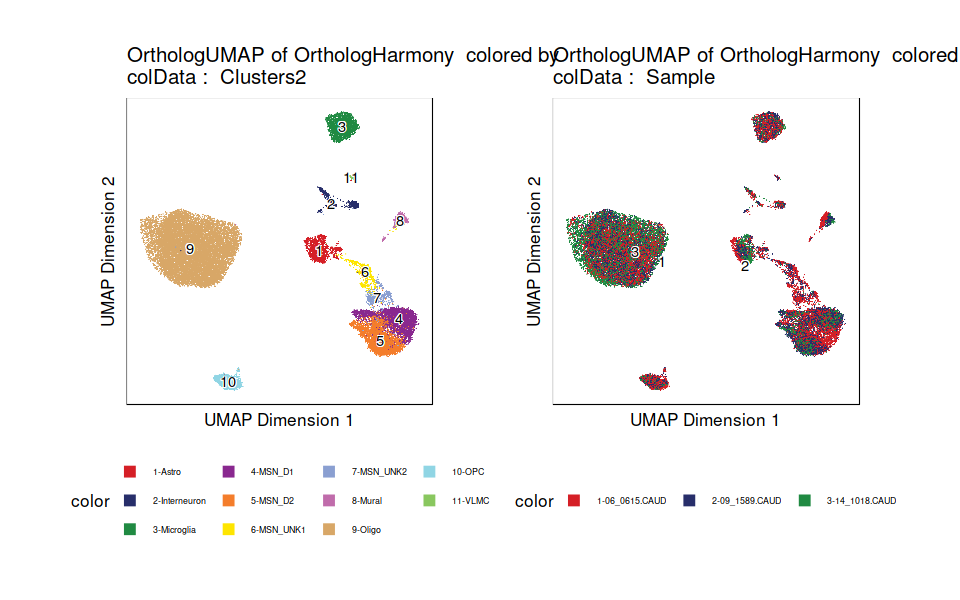

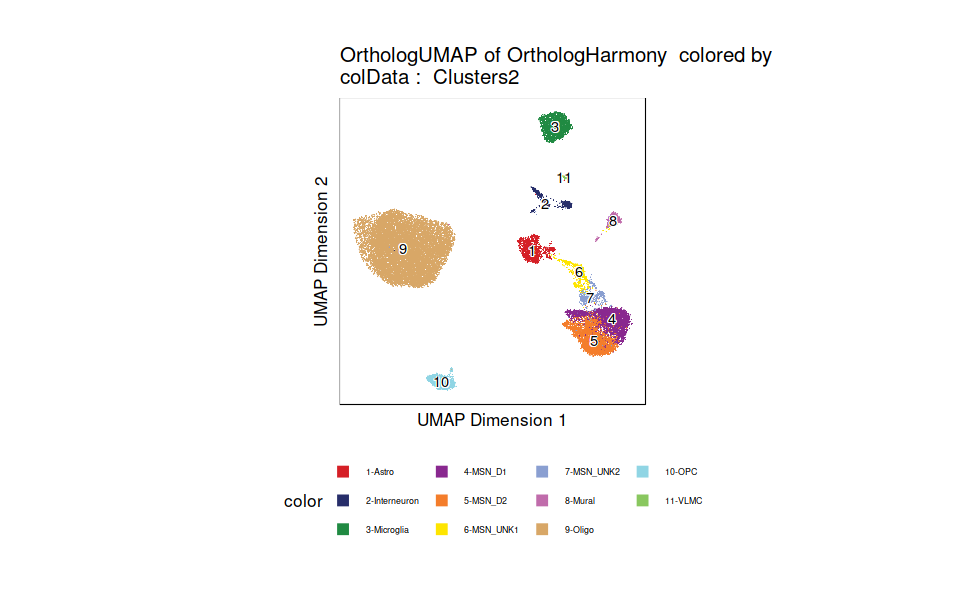

In [24]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Clusters2", embedding = "OrthologUMAP")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Sample", embedding = "OrthologUMAP")
ggAlignPlots(p1, p2, type = "h")
p1

In [25]:
proj = saveArchRProject(ArchRProj = proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

# Load in mouse cSNAIL count matrix

In [12]:
PROJDIR2=file.path('../../../data/raw_data/mm10/Mouse_cSNAIL_D1D2')
cSNAILrse_fn = file.path(PROJDIR2,'rdas',
                        'multiSpeciesOrthologousPeaks_cSNAILfeatureCounts_RSE_n12_20201022.RDS')
rse = readRDS(file = cSNAILrse_fn)
rse

class: RangedSummarizedExperiment 
dim: 271225 12 
metadata(0):
assays(1): counts
rownames(271225): hg38:chr1:810859-811359:250
  hg38:chr1:934822-935322:250 ... hg38:chrX:155382601-155383101:250
  hg38:chrY:4245729-4246229:250
rowData names(18): name score ... SYMBOL GENENAME
colnames(12): AP186STRPVpos AG11633STRPVpos ... Y1Spos Y2Spos
colData names(5): bamFiles Sample Tissue Celltype Batch

In [13]:
###########################################################
## change the mouse cSNAIL to orthologous human coordinates
PROJDIR2=file.path('../../../data/raw_data/cross_species_peak_orthologs')
peakListRDS_fn = file.path(PROJDIR2, 'rdas', 'multispeciesMergedPeakList.rds')
peakList = readRDS(file = peakListRDS_fn)
rowRanges(rse) = peakList[["Consensus"]] # the human coordinates

In [26]:
projected = ArchR::projectBulkATAC(
    ArchRProj = proj, seATAC = rse, 
    reducedDims = "OrthologIterativeLSI",
    embedding = "OrthologUMAP", n = 30) # how many cells to sample for each bulk profile

ArchR logging to : ArchRLogs/ArchR-projectBulkATAC-792f3eb13c43-Date-2020-10-23_Time-13-33-33.log
If there is an issue, please report to github with logFile!

Overlap Ratio of Reduced Dims Features = 1

2020-10-23 13:33:34 : 

13:33:59 Read 5360 rows and found 40 numeric columns

13:33:59 Processing block 1 of 1

13:33:59 Writing NN index file to temp file /tmp/RtmpwTecBR/file792f2f5c6de4

13:33:59 Searching Annoy index using 3 threads, search_k = 4000

13:34:03 Commencing smooth kNN distance calibration using 3 threads

13:34:03 Initializing by weighted average of neighbor coordinates using 3 threads

13:34:04 Commencing optimization for 67 epochs, with 214377 positive edges

13:34:06 Finished

ArchR logging successful to : ArchRLogs/ArchR-projectBulkATAC-792f3eb13c43-Date-2020-10-23_Time-13-33-33.log



In [27]:
########################################
# get the single Cell UMAP coordinates #
singleCellUMAP = projected$singleCellUMAP
singleCellUMAP = cbind(singleCellUMAP, proj@cellColData)

###########################
# get the bulk projections #
simulatedBulkUMAP = projected$simulatedBulkUMAP
simulatedBulkUMAP = simulatedBulkUMAP[sample(nrow(simulatedBulkUMAP)), ]
head(simulatedBulkUMAP)
simulatedBulkUMAP = cbind(simulatedBulkUMAP, colData(rse)[simulatedBulkUMAP$Type,])

DataFrame with 6 rows and 3 columns
                            UMAP1             UMAP2          Type
                        <numeric>         <numeric>         <Rle>
AP186STRPVpos#22 5.02052211761475  5.70893383026123 AP186STRPVpos
YD3A#26          7.81548070907593 -3.09770345687866          YD3A
YD3B#20          7.75525522232056  -2.5209698677063          YD3B
YD3A#13          7.71656465530396 -2.74260807037354          YD3A
YN3A#14          8.80904102325439  2.18945837020874          YN3A
Y1Spos#26        8.64657306671143  2.16547060012817        Y1Spos

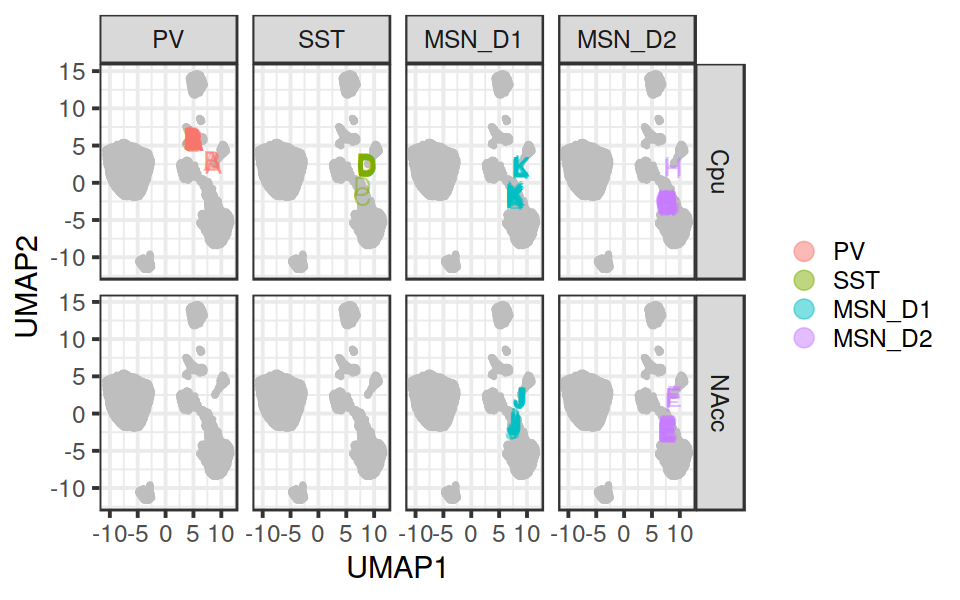

In [28]:
ggplot(as.data.frame(singleCellUMAP), aes(x = UMAP1, y = UMAP2)) + 
  geom_point(color = 'gray', pch = 20) +
  geom_point(data = as.data.frame(simulatedBulkUMAP), 
             aes(x = UMAP1, y = UMAP2, color = Celltype, shape = Sample), 
             alpha = .5, size =5) +
    scale_shape_manual(values = LETTERS, guide = FALSE) +
  facet_grid(Tissue~Celltype) + theme_bw(base_size = 18) +
  theme(legend.title = element_blank())
# guides(colour = guide_legend(override.aes = list(shape = 20, alpha = 1, size = 3)))